# Data load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/hotel_bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


# Data preprocessing

## Data cleaning

In [2]:
# Identify null values
df.isnull().sum() / len(df)


hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [3]:
df['adr'].unique()[:5]

array([  0.,  75.,  98., 107., 103.])

In [4]:
# Drop rows with null values above a certain threshold
df = df.dropna(thresh=0.75 * len(df.columns), axis=0)

In [5]:
# Drop null values
df = df.dropna(subset=['children', 'agent', 'country'])

# Data analysis

- Where do guests come from?

In [6]:
# Get the value counts of the 'Country' column
country_counts = df['country'].value_counts()
country_counts


country
PRT    37591
GBR    10889
FRA     9810
ESP     7848
DEU     6998
       ...  
BHS        1
UMI        1
NPL        1
MWI        1
BFA        1
Name: count, Length: 174, dtype: int64

In [7]:
# Get the top 5 countries that appear the most in the data
top_5_countries = country_counts.head(5)


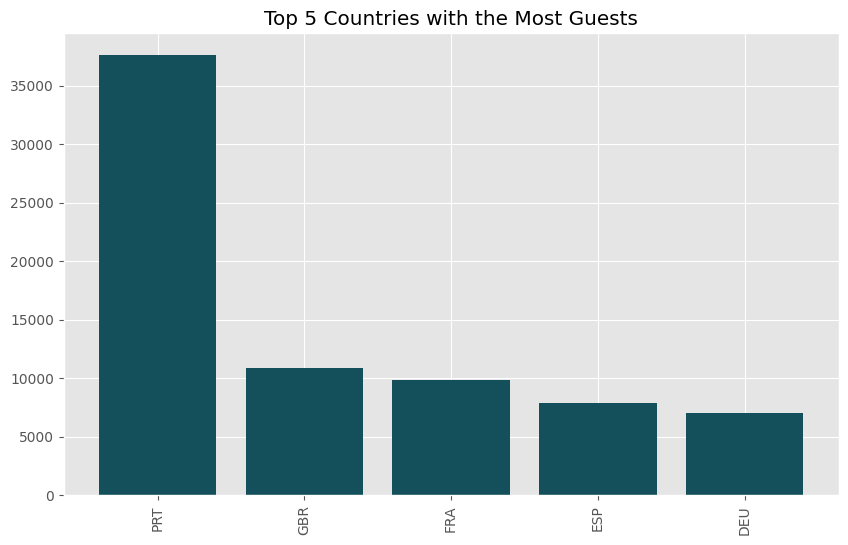

In [8]:
# Plot the data, change the color
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries.index, top_5_countries.values, color='#13505B')
plt.xticks(rotation=90)
plt.title('Top 5 Countries with the Most Guests')
plt.show()

# Price variation throughout the year

In [9]:
# Group prices by year
yearly_prices = df.groupby('arrival_date_year')['adr'].mean()

In [10]:
yearly_prices

arrival_date_year
2015     88.118098
2016    100.951935
2017    118.823468
Name: adr, dtype: float64

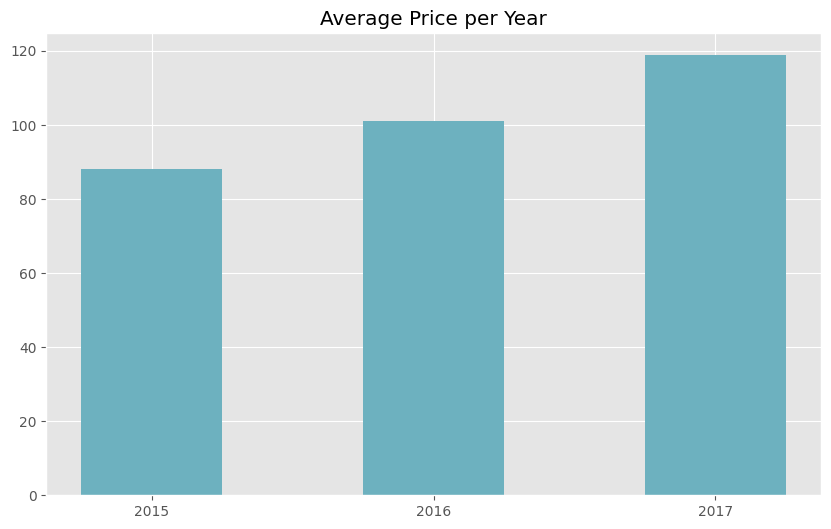

In [11]:
# Plot yearly prices
plt.figure(figsize=(10, 6))
plt.bar(yearly_prices.index, yearly_prices.values, width=0.5, color='#6DB1BF')
plt.title('Average Price per Year')
ticks = range(min(yearly_prices.index), max(yearly_prices.index) + 1)
plt.xticks(ticks)
plt.show()

# What do guests basically prefer?

In [15]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

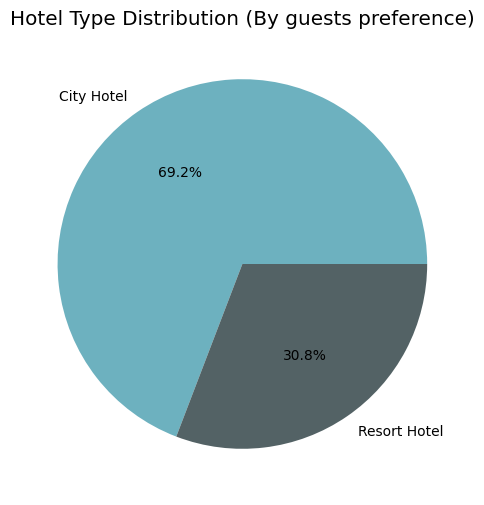

In [16]:
# PLot the distribution using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['hotel'].value_counts(), labels=df['hotel'].value_counts().index, autopct='%1.1f%%', colors=['#6DB1BF', '#536265'])
plt.title('Hotel Type Distribution (By guests preference)')
plt.show()
# plt.figure(figsize=(10, 6))
# plt.bar(df['hotel'].value_counts().index, df['hotel'].value_counts().values, color='#1B2021')
# plt.title('Number of Guests per Hotel Type')
# plt.show()

# Analysing special requests made by costumers

In [17]:
df['total_of_special_requests'].unique()[:5]

array([0, 1, 3, 2, 4])

# Analyzing the relationship between special requests and cancellations.

In [18]:
# Count the amount of cancellations based on the number of special requests
cancelled_requests = df[df['is_canceled'] == 1]['total_of_special_requests'].value_counts()
cancelled_requests

total_of_special_requests
0    29885
1     7066
2     2757
3      425
4       28
Name: count, dtype: int64

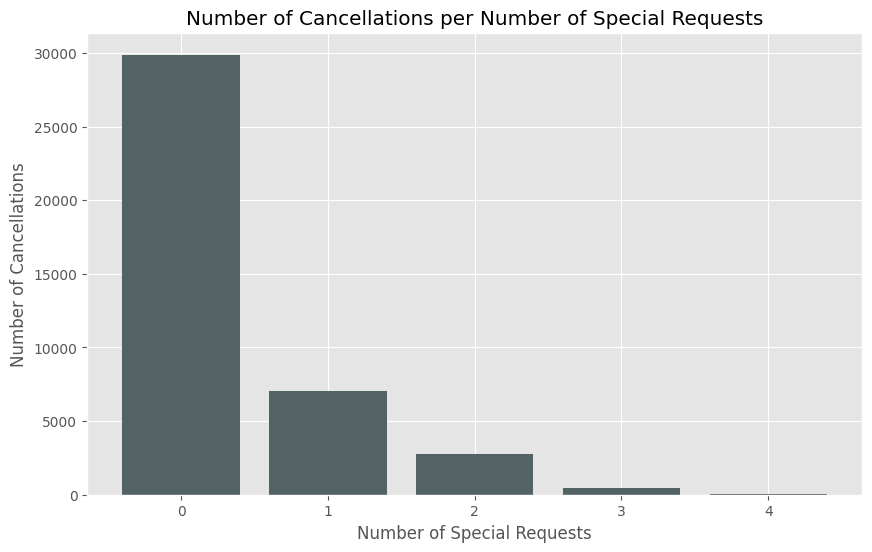

In [19]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(cancelled_requests.index, cancelled_requests.values, color='#536265')
plt.title('Number of Cancellations per Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Cancellations')
plt.show()